# MCMC on Aproximating Integrals

<img src='img/EstimatingIntegrals.PNG' width='700'>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def estimate_integral(function, lower_bound, upper_bound, k, plot=False):
    uniform_samples = np.random.uniform(lower_bound, upper_bound, k)
    rango = (upper_bound - lower_bound)
    
    if plot:
        plt.figure(figsize=(15, 6))
        x = np.linspace(lower_bound, upper_bound, 1000)
        plt.plot(x, function(x), color='red')

    sum_value = 0
    for i in range(k):
        evaluation = function(uniform_samples[i])
        
        if plot:
            plt.scatter(uniform_samples[i], evaluation, color='green')
            plt.vlines(uniform_samples[i], ymin=0, ymax=evaluation, color='grey')

        sum_value += evaluation
    
    if plot:
        plt.plot(x, np.ones(1000)*sum_value / k, color='green', linestyle='--', label='equivalent integral')
        plt.fill_between(x, np.zeros(1000), np.ones(1000)*sum_value / k, color='green', alpha='0.2')

        plt.legend()
        plt.show()
        
    estimation = sum_value * rango / k
    
    return estimation

In [3]:
def f1(x):
    return np.sin(x)**2 * np.cos(x)**2

In [15]:
# Solucion Real
def sol(x):
    return (1/8)*x - (1/32)*np.sin(4*x)

sol(3) - sol(0)

0.39176790368751357

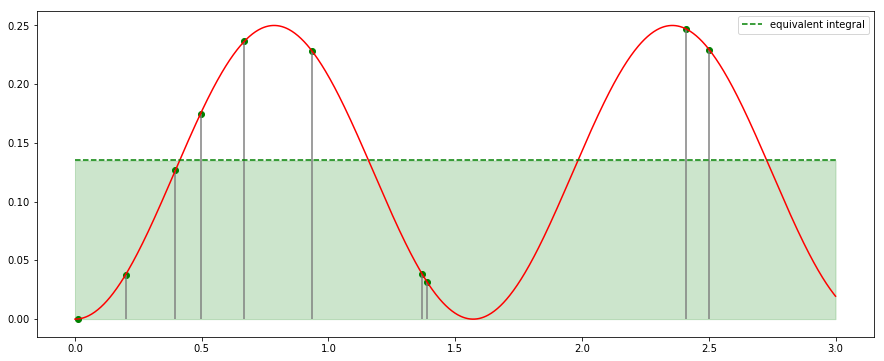

0.40526281213121357

In [20]:
estimate_integral(f1, 0, 3, 10, plot=True)

In [21]:
estimate_integral(f1, 0, 3, 10000)

0.38940261916831653

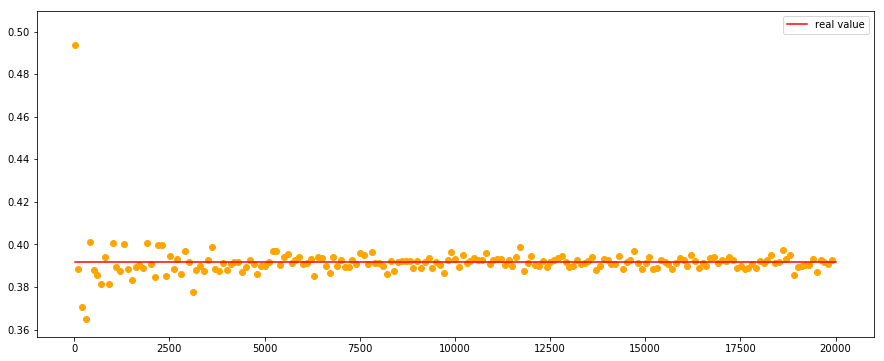

In [23]:
plt.figure(figsize=(15, 6))

k_max = 20000
k_min = 10
salto = 100

suma = 0
for k in range(k_min, k_max, salto):
    value = estimate_integral(f1, 0, 3, k)
    suma += value
    
    plt.scatter(k, value, color='orange')
    

plt.plot(np.linspace(k_min, k_max, 100), np.ones(100)*(sol(3) - sol(0)), color='red', label='real value')
plt.legend()
plt.show()

Es posible ver que el valor estimado converge rapidamente, quedandose en un intervalo de error razonable.

In [24]:
def bivariate_estimate(function, lower_bound_1, upper_bound_1, lower_bound_2, upper_bound_2, k):
    uniform_samples_1 = np.random.uniform(lower_bound_1, upper_bound_1, k)
    uniform_samples_2 = np.random.uniform(lower_bound_2, upper_bound_2, k)

    rango_1 = (upper_bound_1 - lower_bound_1)
    rango_2 = (upper_bound_2 - lower_bound_2)

    sum_value = 0
    for i in range(k):
        evaluation = function(uniform_samples_1[i], uniform_samples_2[i])
        sum_value += evaluation
            
    estimation = sum_value * rango_1 * rango_2 / k
    
    return estimation

In [25]:
def f2(x, y):
    return (x + y)**2

In [30]:
bivariate_estimate(f2, 0, 2, -1, 1, 10000)

6.6531327639678581

In [27]:
20/3  # Real Value

6.666666666666667